<a href="https://colab.research.google.com/github/Vignesh424/Movie_Ratings/blob/main/Movie_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
data = pd.read_csv('/content/top_100_movies_by_genres.csv')

In [37]:
#to get the overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              1612 non-null   object 
 1   Rank               1612 non-null   float64
 2   RatingTomatometer  1612 non-null   object 
 3   Title              1612 non-null   object 
 4   No. of Reviews     1612 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 63.1+ KB


In [38]:
#to see the shape of the data
data.shape

(1612, 5)

In [39]:
#to describe the data
data.describe()

,Rank,No. of Reviews
count,1612.000000,1612.000000
mean,48.702854,148.065136
std,28.453613,120.011877
min,1.000000,40.000000
25%,24.000000,58.000000
50%,48.000000,95.500000
75%,73.000000,212.500000
max,100.000000,571.000000


In [40]:
data.head()

,Genre,Rank,RatingTomatometer,Title,No. of Reviews
0,Action & Adventure,1.0,96%,Black Panther (2018),525
1,Action & Adventure,2.0,94%,Avengers: Endgame (2019),547
2,Action & Adventure,3.0,97%,Mission: Impossible - Fallout (2018),437
3,Action & Adventure,4.0,97%,Mad Max: Fury Road (2015),434
4,Action & Adventure,5.0,97%,Spider-Man: Into the Spider-Verse (2018),393


In [41]:
#Convert percentage into decimals
data['RatingTomatometer'] = data['RatingTomatometer'].apply(lambda value: (float(value.strip('%'))/100))
data.head()

,Genre,Rank,RatingTomatometer,Title,No. of Reviews
0,Action & Adventure,1.0,0.96,Black Panther (2018),525
1,Action & Adventure,2.0,0.94,Avengers: Endgame (2019),547
2,Action & Adventure,3.0,0.97,Mission: Impossible - Fallout (2018),437
3,Action & Adventure,4.0,0.97,Mad Max: Fury Road (2015),434
4,Action & Adventure,5.0,0.97,Spider-Man: Into the Spider-Verse (2018),393


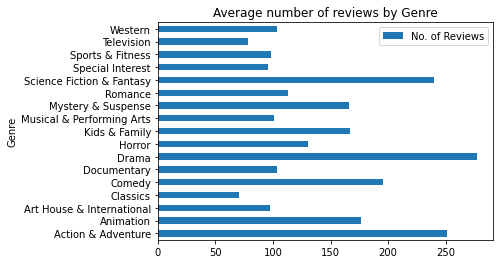

In [42]:
#Bar chart for reviews per genre
avg_num_reviews = data[['Genre', 'No. of Reviews']].groupby('Genre').mean()
avg_num_reviews.plot.barh(title='Average number of reviews by Genre')

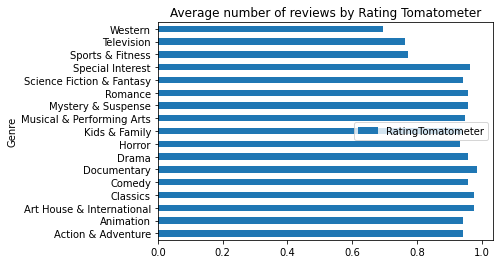

In [43]:
# Bar chart for Ratings and Genre
avg_tomatoemeter_rating = data[['Genre', 'RatingTomatometer']].groupby('Genre').mean()
avg_tomatoemeter_rating.plot.barh(title='Average number of reviews by Rating Tomatometer')

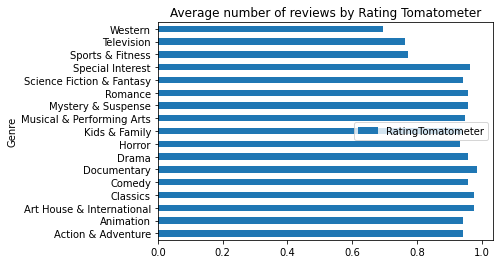

In [44]:
#Bar chart for Avg tomato reviews
avg_tomatoemeter_rating = data[['Genre', 'RatingTomatometer']].groupby('Genre').mean()
avg_tomatoemeter_rating.plot.barh(title='Average number of reviews by Rating Tomatometer')

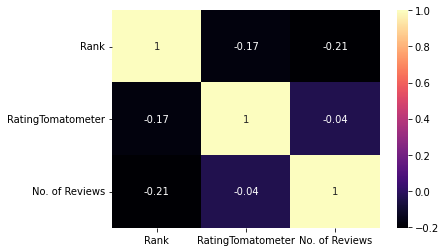

In [46]:
#Heatmap correlation Matrix
heat = data.corr()
sns.heatmap(data=heat, annot=True, cmap='magma')

In [72]:
X = data.drop(columns=['RatingTomatometer','Genre', 'Title'],axis=1)
y = data['RatingTomatometer']

In [73]:
X

,Rank,No. of Reviews
0,1.0,525
1,2.0,547
2,3.0,437
3,4.0,434
4,5.0,393
...,...,...
1607,82.0,101
1608,83.0,55
1609,84.0,103
1610,85.0,153


In [74]:
y

0       0.96
1       0.94
2       0.97
3       0.97
4       0.97
        ... 
1607    0.15
1608    0.16
1609    0.14
1610    0.12
1611    0.02
Name: RatingTomatometer, Length: 1612, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [76]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()
classifier.fit(X,y)

DecisionTreeRegressor()

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
classifier.score(X_train, y_train)

0.9450603123038119

In [79]:
classifier.score(X_test, y_test)

0.9720706674043377

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


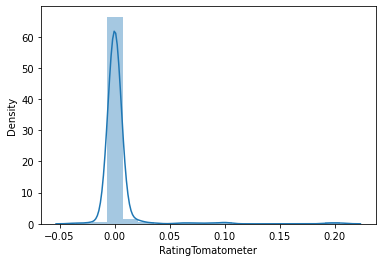

In [81]:
sns.distplot(y_test-y_pred)
plt.show()

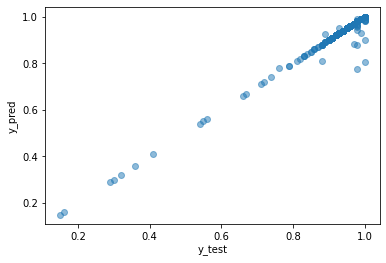

In [82]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.003323013415892674
MSE: 0.0003767113863089096
RMSE: 0.01940905423530239
